In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
nx = 51
sigma = 0.5
alpha = 1.22e-3
L = 1.0
dx = L/(nx-1)
nt = 1000
dt = sigma*dx**2/alpha

In [3]:
x = numpy.linspace(0.0,L,nx)
T0 = numpy.zeros_like(x)
T0[0] = 100
T0[-1] = 0

In [4]:
def FTCS(T0, nt, dt, dx, alpha, condition, q=0.0):
    T = T0.copy()
    for i in range(nt):
        T[1:-1] = T[1:-1] + alpha*dt/dx**2 * (T[:-2]-2*T[1:-1]+T[2:])
        T[0] = T0[0]
        if condition=='N':
            T[-1] = T[-2] + q * dx
        elif condition=='D':
            T[-1] = T0[-1]
    return T

In [5]:
T_d = FTCS(T0, nt, dt, dx, alpha, 'D')

In [6]:
T_n = FTCS(T0, nt, dt, dx, alpha, 'N', 0.0)

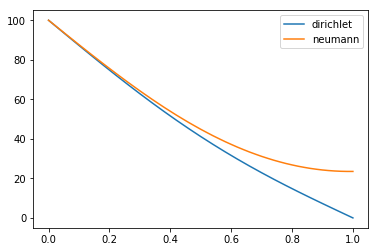

In [7]:
pyplot.plot(x, T_d, label='dirichlet')
pyplot.plot(x, T_n, label='neumann')
pyplot.legend()